<a href="https://colab.research.google.com/github/sg2083/independent_study/blob/main/Sentiment_analysis_26_2_wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Stock-Related News & Posts and Predicting Stock Market Prices

### Introduction
The stock market is highly influenced by investor sentiment, which is often reflected in news articles, social media discussions, and online forums. This study focuses on analyzing the sentiment of stock-related posts from multiple sources, including Reddit, NewsAPI, and historical stock prices.

The goal is to determine whether online sentiment correlates with stock price movements and if it can be used as a predictive feature for stock performance.

## Research Questions
1. Does investor sentiment expressed in Reddit posts and news articles correlate with stock price movements for Tesla?
2. Can sentiment data extracted from online platforms be used to predict stock price trends in the short term?
3. What is the relative significance of different sentiment sources (Reddit vs. NewsAPI) in predicting stock market performance?
4. How does sentiment change in response to major news events, and does this sentiment shift correlate with subsequent stock price movements?

##Hypotheses
>**H1**:There is a significant positive correlation between positive sentiment in Reddit posts/news articles and an increase in Tesla's stock price.<br>
**H2**: Negative sentiment in Reddit posts/news articles is significantly correlated with a decrease in Tesla's stock price.<br>
**H3**: Sentiment data from Reddit is more predictive of short-term stock price fluctuations than sentiment data from news articles.<br>
**H4**: Major news events (e.g., product launches, regulatory announcements) cause a significant shift in sentiment, which is reflected in short-term stock price movements.

## Literature Review
The study by Nti, Adekoya, and Weyori (2020) investigates how public sentiment, derived from web news, Twitter, Google Trends, and forum discussions, influences stock market predictions. Using sentiment analysis with an Artificial Neural Network (ANN) model, the authors predict stock prices on the Ghana Stock Exchange (GSE) over time frames of 1 to 90 days. They find that combining multiple data sources improves prediction accuracy, with the highest accuracy (70.66–77.12%) achieved from a combined dataset. The study highlights a strong link between stock market behavior and social media, suggesting that sentiment data from online platforms can help investors predict future stock price movements and make better investment decisions.
link: https://sciendo.com/article/10.2478/acss-2020-0004

## How its different from whats already been done
Event-Driven Sentiment Evolution and Its Impact on Stock Price Prediction

### Data
The data for this study is collected from three primary sources: **Reddit, NewsAPI, and stock market data**. Reddit posts related to **Tesla** stock are retrieved using praw library from financial discussion subreddits like r/wallstreetbets, capturing post titles and timestamps. News articles mentioning Tesla are obtained via NewsAPI, extracting headlines, publication dates, and sources. Historical stock price data is being sourced from Yahoo Finance api, including daily open, high, low, close prices, trading volume, and other financial indicators.

Since these datasets originate from different platforms, they contain varying timestamp formats, time zones, and missing values, requiring careful preprocessing and merging to align sentiment data with stock price movements for further analysis.

### Data Preprocessing
The collected data is being cleaned and standardized before merging. Steps include:

1. Date Format Standardization

  * Convert timestamps from different time zones to UTC
  * Convert stock market timestamps (which include hours/minutes) to date-only format

2. Column Renaming for Clarity

  * Title → title_reddit (for Reddit)
  * Title → title_news (for NewsAPI)
  
  This prevents column name conflicts

3. Handling Missing Data

  * Some dates lack both Reddit posts and news articles
  * Missing values must be carefully handled to avoid bias

4. Merging Data

  Outer join used to keep all records from Reddit, NewsAPI, and stock price data Ensures no loss of important data points Note: Since data comes from multiple sources, preprocessing is still in progress to handle scattered and missing data.

In [1]:
# @title Importing required libraries
!pip install newsapi-python
!pip install praw

import yfinance as yf
from newsapi import NewsApiClient
import praw
from datetime import datetime
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


In [2]:
# @title Fetching stock history data for Tesla stocks
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")
print(tesla_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2024-02-26 00:00:00-05:00  192.289993  201.779999  192.000000  199.399994   
2024-02-27 00:00:00-05:00  204.039993  205.600006  198.259995  199.729996   
2024-02-28 00:00:00-05:00  200.419998  205.300003  198.440002  202.039993   
2024-02-29 00:00:00-05:00  204.179993  205.279999  198.449997  201.880005   
2024-03-01 00:00:00-05:00  200.520004  204.520004  198.500000  202.639999   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-02-26 00:00:00-05:00  111747100        0.0           0.0  
2024-02-27 00:00:00-05:00  108645400        0.0           0.0  
2024-02-28 00:00:00-05:00   99806200        0.0           0.0  
2024-02-29 00:00:00-05:00   85907000        0.0           0.0  
2024-03-01 00:00:00-05:00   82099200        0.0           0.0  


In [3]:
# # import tweepy

# # # Replace with your API keys
# # api_key = "QJDjqRmClnqkLg7nmNQ2gg9Qc"
# # api_secret = "kzuVz5zut9BdrbUML9w3upnwkW7mmFWe7iLUnxdsiBRU10w3ec"
# # access_token = "1268163737153728512-Qr5jw5gZ6mz2ZbN4QW3pq5kxw5JAi7"
# # access_secret = "qQ5WVKhmj3XX17WQxMfoJEzgAqwFxwz8qdYEsS3IaL69a"
# # bearer_token = "AAAAAAAAAAAAAAAAAAAAAMMezAEAAAAAtN2XctoVzTlyEi8YhnI6%2FEeIRUM%3Dx7uIiCT3lQMTLkCSJkAGPBVIqawsEkrH4qXPlWJNOC2JYupBwa"

# # # Authenticate
# # client = tweepy.Client(bearer_token=bearer_token)

# from tweepy import OAuthHandler
# from tweepy import API

# consumer_key = 'YFUHQYil2JuiR4ws600kN2yD2'
# consumer_secret = '0x6LEfbpBz0Rnvm3dBw7lFAeygUTFcDaNU4YjN6eUMTFHLoUP9'
# access_token = '1889172540888948736-jrvTNNgPQHvEfE5OAyaaCBBfx2xpWR'
# access_token_secret = 'dK2tcEBm1nEBxZoGAiZw2TgnDZUhHyfMuYzVGrlorekeN'
# # Consumer key authentication
# auth = OAuthHandler(consumer_key, consumer_secret)

# # Access key authentication
# auth.set_access_token(access_token, access_token_secret)

# # Set up the API with the authentication handler
# api = API(auth)

In [4]:
# import tweepy
# import csv
# import datetime

# # Twitter API credentials
# bearer_token = 'AAAAAAAAAAAAAAAAAAAAAFw2zAEAAAAABxOmWd%2BogWMxVgvfWVX3Lrsy8T4%3D9QG2pYsqHFgF2XkzGbC7oiIALJNQGE13bI9uv60b0i5oPJWWdo'  # Bearer Token for API v2

# # Authenticate to the Twitter API
# client = tweepy.Client(bearer_token=bearer_token)

# # Define the query and date range for historic tweets
# query = 'Tesla'
# # Use 'since' and 'until' as parameters to filter for tweets within the past 7 days
# max_tweets = 10  # Limit to 10 tweets

# # Create a function to collect the tweets
# def collect_tweets(query, max_tweets=10):
#     tweets = []
#     # Using search_recent_tweets for recent tweets (within the past 7 days)
#     for tweet in tweepy.Paginator(client.search_recent_tweets,  # Using search_recent_tweets for free access
#                                   query=query,
#                                   tweet_fields=['created_at', 'author_id', 'text'],
#                                   max_results=10).flatten(limit=max_tweets):  # Limit to 10 tweets
#         tweets.append([tweet.created_at, tweet.author_id, tweet.text])

#     return tweets

# # Collect the tweets
# tweets = collect_tweets(query, max_tweets)

# # Save the tweets to a CSV file
# with open('tesla_tweets.csv', 'w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Date", "User ID", "Tweet"])
#     writer.writerows(tweets)

# print(f"Collected {len(tweets)} tweets about Tesla.")



In [5]:
# from google.colab import files
# print("\n--- CSV Content ---")
# with open('tesla_tweets.csv', 'r', encoding='utf-8') as file:
#     csv_content = file.read()
#     print(csv_content)

# files.download('tesla_tweets.csv')

In [6]:
# query = "(Tesla OR TSLA OR Tesla stock OR Tesla shares) -is:retweet lang:en"

# # # Fetch recent tweets (last 7 days)
# # tweets = client.search_recent_tweets(query=query, max_results=5, tweet_fields=["created_at", "text"])

# # # Store in DataFrame & Save
# # data = [[tweet.created_at, tweet.text] for tweet in tweets.data]
# # df = pd.DataFrame(data, columns=["timestamp", "tweet"])
# # df.to_csv("stock_tweets.csv", index=False)

# # print("Saved tweets to stock_tweets.csv!")
# import requests

# url = "https://api.twitter.com/2/tweets/search/recent"

# params = {
#     "query": "Tesla OR TSLA OR Tesla stock -is:retweet lang:en",
#     "max_results": 10,
#     "tweet.fields": "created_at,text"
# }

# # API headers
# headers = {"Authorization": f"Bearer {bearer_token}"}

# # Make request
# response = requests.get(url, headers=headers, params=params)

# # Check response status
# if response.status_code == 200:
#     tweets = response.json()
#     for tweet in tweets["data"]:
#         print(f"{tweet['created_at']}: {tweet['text']}\n")
# else:
#     print(f"Error {response.status_code}: {response.text}")

In [7]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

current_date = datetime.today().date()
older_date = current_date - relativedelta(months=1)

current_date_str = current_date.strftime("%Y-%m-%d")
older_date_str = older_date.strftime("%Y-%m-%d")

newsapi = NewsApiClient(api_key="3c53572d3893466a8240a9916ff53acb")

articles = newsapi.get_everything(q="Tesla stock", language="en", from_param=older_date_str, to=current_date_str, page_size=100)
print(articles["articles"])

news_data=[]
for article in articles["articles"]:
    news_data.append({'Date': article['publishedAt'], 'Title': article['title'], 'Description': article['description']})
print(news_data)

[{'source': {'id': 'the-verge', 'name': 'The Verge'}, 'author': 'Andrew J. Hawkins', 'title': 'More Tesla showroom protests planned for this weekend', 'description': 'Protestors are planning more demonstrations outside Tesla showrooms nationwide this weekend, as Elon Musk’s polarizing behavior and political activities within the Trump administration continue to have negative side effects on his electric car business. The p…', 'url': 'https://www.theverge.com/news/612912/tesla-protest-showroom-vandalism-elon-musk-doge', 'urlToImage': 'https://platform.theverge.com/wp-content/uploads/sites/2/2025/02/STK086_TeslaB.jpg?quality=90&strip=all&crop=0%2C10.732984293194%2C100%2C78.534031413613&w=1200', 'publishedAt': '2025-02-14T15:04:22Z', 'content': 'Activists are calling for demonstrations at Tesla showrooms.\r\n\n\nProtestors are planning more demonstrations outside Tesla showrooms nationwide this weekend, as Elon Musk’s polarizing behavior and pol… [+2857 chars]'}, {'source': {'id': None, '

In [8]:
import tabulate

reddit = praw.Reddit(
    client_id="AHwBapk4BbgYfXKt4SSpAw",
    client_secret="_iiyfM51ZSRzzFtwYV3zqBxbbj7fqw",
    user_agent="StockSentimentAnalysis"
)

# Define subreddits to search
subreddits = ["wallstreetbets", "stocks"]
query = "Tesla stock"
limit = 200  # Fetch more posts since we filter manually

# Get timestamps for the last 1 month
current_date = datetime.utcnow()
one_month_back = current_date - relativedelta(months=1)
one_month_back_timestamp = int(one_month_back.timestamp())

# Store results
results = []

for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    posts = subreddit.search(query, sort="new", limit=limit)  # Get recent posts

    for post in posts:
        # Only keep posts from the last 1 month
        if post.created_utc >= one_month_back_timestamp:
            results.append({
                "Subreddit": subreddit_name,
                "Date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                "Title": post.title,
                "Score": post.score,
                "Comments": post.num_comments,
                "URL": post.url
            })

# Display results in a readable table
if results:
    print(tabulate.tabulate(results, headers="keys", tablefmt="grid"))
    print(results)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



+----------------+------------+---------------------------------------------------------------------------------------------------------------------------------------------+---------+------------+---------------------------------------------------------------------------------------------------------------------------------+
| Subreddit      | Date       | Title                                                                                                                                       |   Score |   Comments | URL                                                                                                                             |
+================+============+=============================================================================================================================================+=========+============+=================================================================================================================================+
| wallstreetbets | 

In [9]:
!pip install GoogleNews

from GoogleNews import GoogleNews
googlenews = GoogleNews(start='01/25/2025', end='02/25/2025')  # MM/DD/YYYY format
googlenews.search('Tesla')

# Fetch results
news_results = googlenews.result()

# Print news
for news in news_results:
    print(news)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.9 MB/s eta 0:00:00


{'title': 'Tesla acquires bankrupted automation engineering firm', 'media': 'Electrek', 'date': '7 minutes ago', 'datetime': datetime.datetime(2025, 2, 25, 19, 21, 54, 372810), 'desc': 'Tesla has acquired parts of bankrupted automation engineering firm Manz based in Germany. It will on board about 300 of its employees.', 'link': 'https://electrek.co/2025/02/25/tesla-acquires-bankrupted-automation-engineering-firm/%3Fextended-comments%3D1&ved=2ahUKEwjb0o68x9-LAxW2dvUHHf4uHwUQxfQBegQIAxAC&usg=AOvVaw2r9Py02vKobHO-ctp2nZXm', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}
{'title': "Tesla's market value tumbles below $1 trillion as its Europe sales slump", 'media': 'MSN', 'date': '8 minutes ago', 'datetime': datetime.datetime(2025, 2, 25, 19, 20, 54, 387835), 'desc': "By Noel Randewich (Reuters) - Tesla's stock tumbled 8% on Tuesday, pushing its market value below $1 trillion for the first time since November after data...", 'link': 'https://www

In [10]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Finnhub API Key (replace with your key)
API_KEY = "cuuush9r01qpi6rsa3hgcuuush9r01qpi6rsa3i0"

# Define date range (past 30 days)
today = datetime.today().strftime('%Y-%m-%d')
last_month = (datetime.today() - timedelta(days=30)).strftime('%Y-%m-%d')

# Finnhub API endpoint for Tesla news
url = f"https://finnhub.io/api/v1/company-news?symbol=TSLA&from={last_month}&to={today}&token={API_KEY}"

# Fetch data
response = requests.get(url)
finn_news_data = response.json()

# Convert to DataFrame
news_df = pd.DataFrame(finn_news_data)

# # Keep relevant columns
# news_df = news_df[['headline', 'datetime', 'source', 'url']]

# Convert timestamp to readable date
news_df['datetime'] = pd.to_datetime(news_df['datetime'], unit='s').dt.strftime('%Y-%m-%d')

# Display Tesla news
print(news_df)


    category    datetime                                           headline  \
0    company  2025-02-25          Wall Street Lunch: A Crisis Of Confidence   
1    company  2025-02-25  Sell Tesla Before Bubble Bursts After Robotaxi...   
2    company  2025-02-25  Rivian Stock Could Show A Big Boost As Tesla's...   
3    company  2025-02-25  Pioneer Global Sustainable Equity Fund Q4 2024...   
4    company  2025-02-25                Apple Is Not Worth It At This Price   
..       ...         ...                                                ...   
241  company  2025-02-08        Tesla: Don't Be The Last Bull Left Standing   
242  company  2025-02-08  Musk Brings His Business Playbook to Washingto...   
243  company  2025-02-07  USAID Workers Can’t Be Placed on Leave, Federa...   
244  company  2025-02-07  Elon Musk’s DOGE Is Heading to the Pentagon. D...   
245  company  2025-02-07  Stock Market Today: Nasdaq Slumps 1.1% After H...   

            id                                     

In [11]:
# Convert lists to DataFrames if necessary
try:
  results_df = pd.DataFrame(results)
except:
  print("results is not a valid list or dataframe")

try:
  news_data_df = pd.DataFrame(news_data)
except:
  print("news_data is not a valid list or dataframe")

print(results_df.head(2))
print("-------------------")
print(news_data_df.head(2))
print("-------------------")
print(news_df.head(2))

        Subreddit        Date  \
0  wallstreetbets  2025-02-21   
1  wallstreetbets  2025-02-17   

                                               Title  Score  Comments  \
0  the sector you've never touched IS a 10-bagger...    587       210   
1  BlackBerry: A Legacy Stock That’s Going To Get...   1464       575   

                                                 URL  
0  https://www.reddit.com/r/wallstreetbets/commen...  
1  https://www.reddit.com/r/wallstreetbets/commen...  
-------------------
                   Date                                              Title  \
0  2025-02-14T15:04:22Z  More Tesla showroom protests planned for this ...   
1  2025-02-15T23:35:46Z  Americans protest Elon Musk: 'He should not be...   

                                         Description  
0  Protestors are planning more demonstrations ou...  
1  Protesters organized small #TeslaTakeover demo...  
-------------------
  category    datetime                                           headline  

In [12]:
# Change date format in news_data_df
news_data_df['Date'] = pd.to_datetime(news_data_df['Date']).dt.strftime('%Y-%m-%d')

# Change column names in news_df
news_df = news_df.rename(columns={
    'datetime': 'Date',
    'headline': 'Title',
    'summary': 'Description'
})

In [13]:
print(news_data_df.columns)
print(news_df.columns)
print(results_df.columns)
print(tesla_data.columns)

Index(['Date', 'Title', 'Description'], dtype='object')
Index(['category', 'Date', 'Title', 'id', 'image', 'related', 'source',
       'Description', 'url'],
      dtype='object')
Index(['Subreddit', 'Date', 'Title', 'Score', 'Comments', 'URL'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [14]:
# Convert Date column to datetime format for all datasets
for df in [news_data_df, news_df, results_df]:
    if not df.empty and "Date" in df.columns: # check if df is empty and if 'Date' column exists
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce", format="%Y-%m-%d")

# Drop unnecessary columns from Finnhub, Reddit and NewsAPI data
# new_data_df = news_data_df.drop(columns=["id"])
news_df = news_df.drop(columns=["category", "related", "image", "url", "source", "id"], errors='ignore')
results_df = results_df.drop(columns=["Score", "Comments", "Subreddit", "URL"], errors='ignore')

# Step 1: Merge news_data_df (NewsAPI), news_df (Finnhub), and results_df (Reddit)
merged_news = news_data_df.merge(news_df, on="Date", how="outer").merge(results_df, on="Date", how="outer")

In [15]:
tesla_data = tesla_data.reset_index()
print(tesla_data.columns)

tesla_data["Date"] = tesla_data["Date"].dt.tz_localize(None)

# Step 2: Merge the resulting dataset with tesla_data
final_merged_df = merged_news.merge(tesla_data, on="Date", how="outer")

# Rename columns based on data source
final_merged_df = final_merged_df.rename(columns={
    "Title_x": "NewsAPI_Title",
    "Description_x": "NewsAPI_Description",
    "Title_y": "Finnhub_Title",
    "Description_y": "Finnhub_Description",
    "Title": "Reddit_Title"
})

# Handle missing values by filling NaN with empty strings for text columns
text_cols = ["NewsAPI_Title", "NewsAPI_Description", "Finnhub_Title", "Finnhub_Description", "Reddit_Title"]
final_merged_df[text_cols] = final_merged_df[text_cols].fillna("")

# Remove duplicates
final_merged_df = final_merged_df.drop_duplicates()

# Save the cleaned dataset as CSV
final_merged_df.to_csv("final_merged_data.csv", index=False)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [16]:
# Aggregate titles per date to avoid duplication
aggregated_df = final_merged_df.groupby("Date").agg({
    "NewsAPI_Title": lambda x: list(set(x.dropna())),
    "NewsAPI_Description": lambda x: list(set(x.dropna())),
    "Finnhub_Title": lambda x: list(set(x.dropna())),
    "Finnhub_Description": lambda x: list(set(x.dropna())),
    "Reddit_Title": lambda x: list(set(x.dropna())),
    "Open": "first",
    "High": "first",
    "Low": "first",
    "Close": "first",
    "Volume": "first",
    "Dividends": "first",
    "Stock Splits": "first"
}).reset_index()

# Save the cleaned and aggregated dataset
aggregated_df.to_csv("final_cleaned_data.csv", index=False)

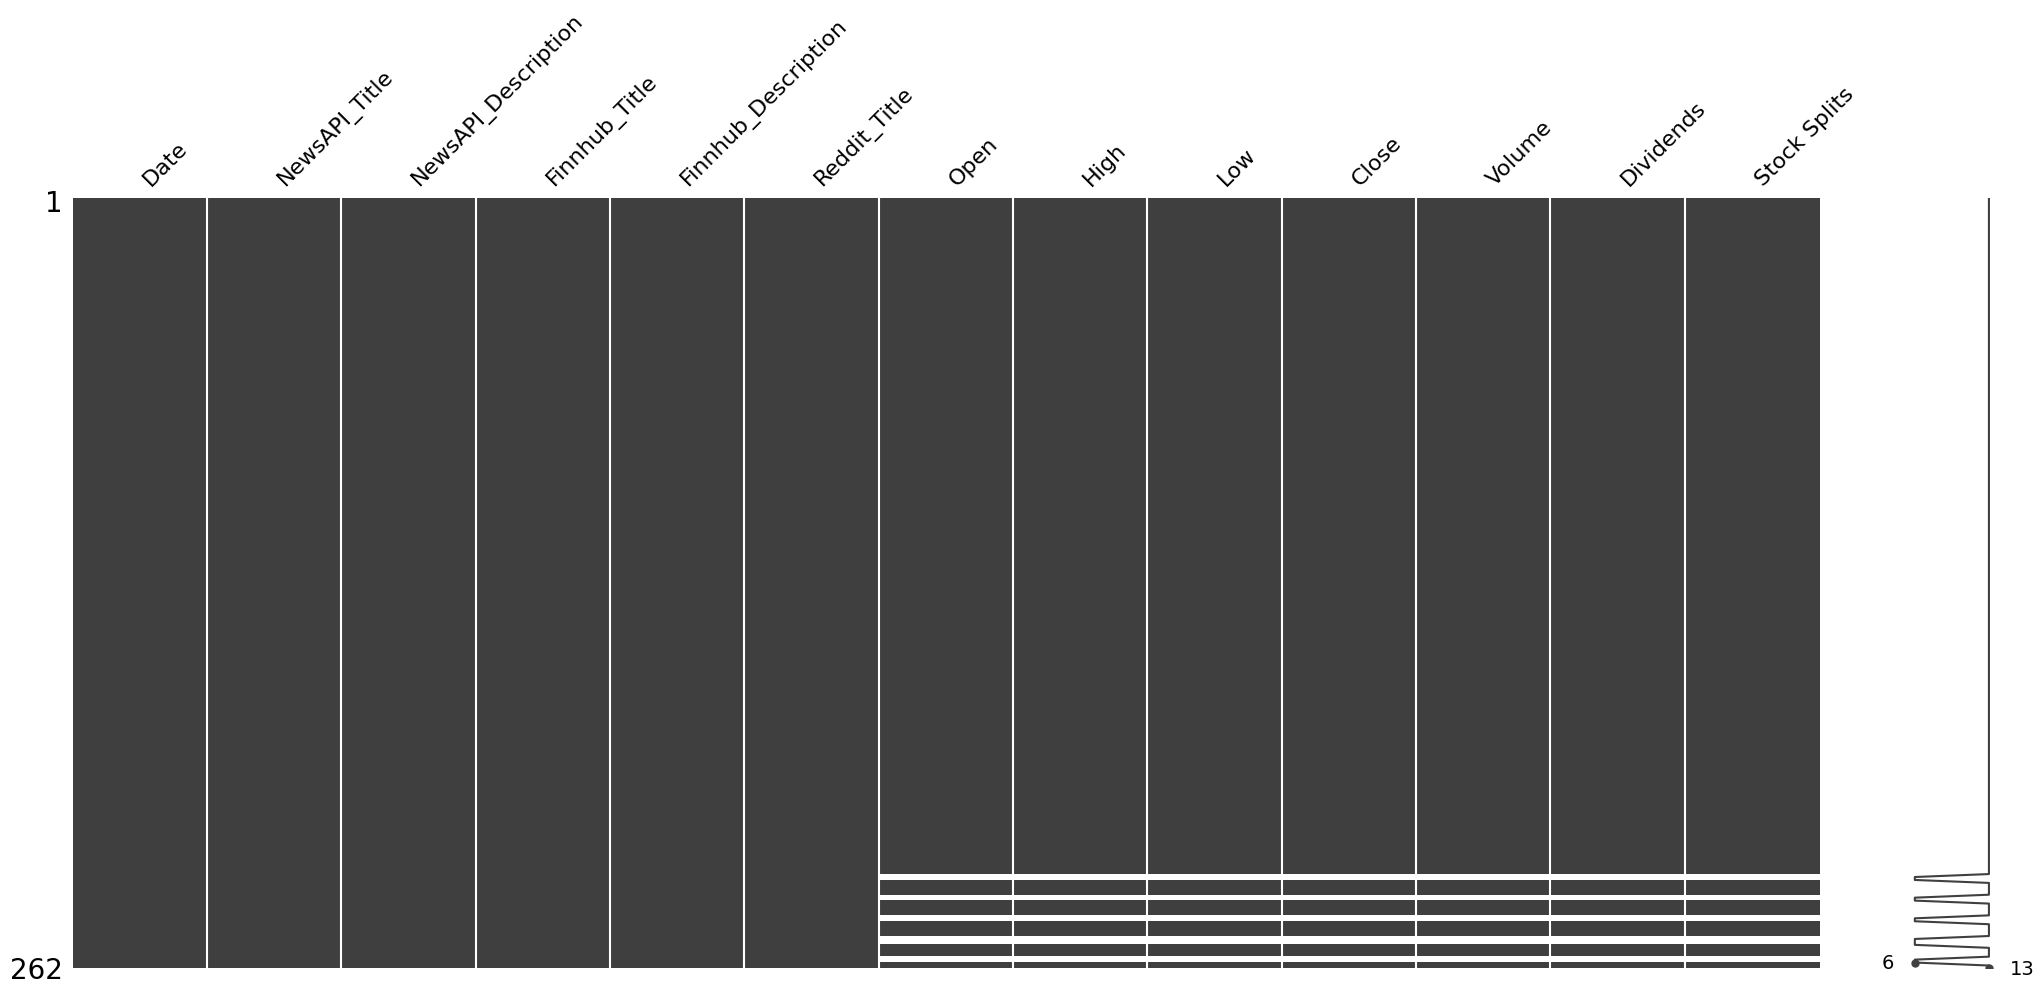

In [18]:
import missingno as msno
import matplotlib.pyplot as plt

# Assuming 'aggregated_df' is already defined from the previous code

# Create the msno plot
msno.matrix(aggregated_df)
plt.show()
